### Predicting heart disease using 4 Machine learning algorithms and comparing their accuracy in prediciting heart disease.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs
# Pretty display for notebooks
%matplotlib inline

#### Read heart data from csv and display first 5 

In [3]:
# TODO: Load the heart dataset
data = pd.read_csv("heart2.csv")
# TODO: Display the first five records
display(data.head(n=5))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We can see below that we have 361 rows of data entries and none of them are null.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 14 columns):
age         361 non-null int64
sex         361 non-null int64
cp          361 non-null int64
trestbps    361 non-null int64
chol        361 non-null int64
fbs         361 non-null int64
restecg     361 non-null int64
thalach     361 non-null int64
exang       361 non-null int64
oldpeak     361 non-null float64
slope       361 non-null int64
ca          361 non-null int64
thal        361 non-null int64
target      361 non-null int64
dtypes: float64(1), int64(13)
memory usage: 39.6 KB


#### Data preparations-- split data into feature and target set

In [5]:
#Displays the first 2 columns
display(data.head(n=2))
# Split the data into features and target label
target_raw = data['target']
features_raw = data.drop(['target'], axis = 1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


Histogram showing data attribute distribution

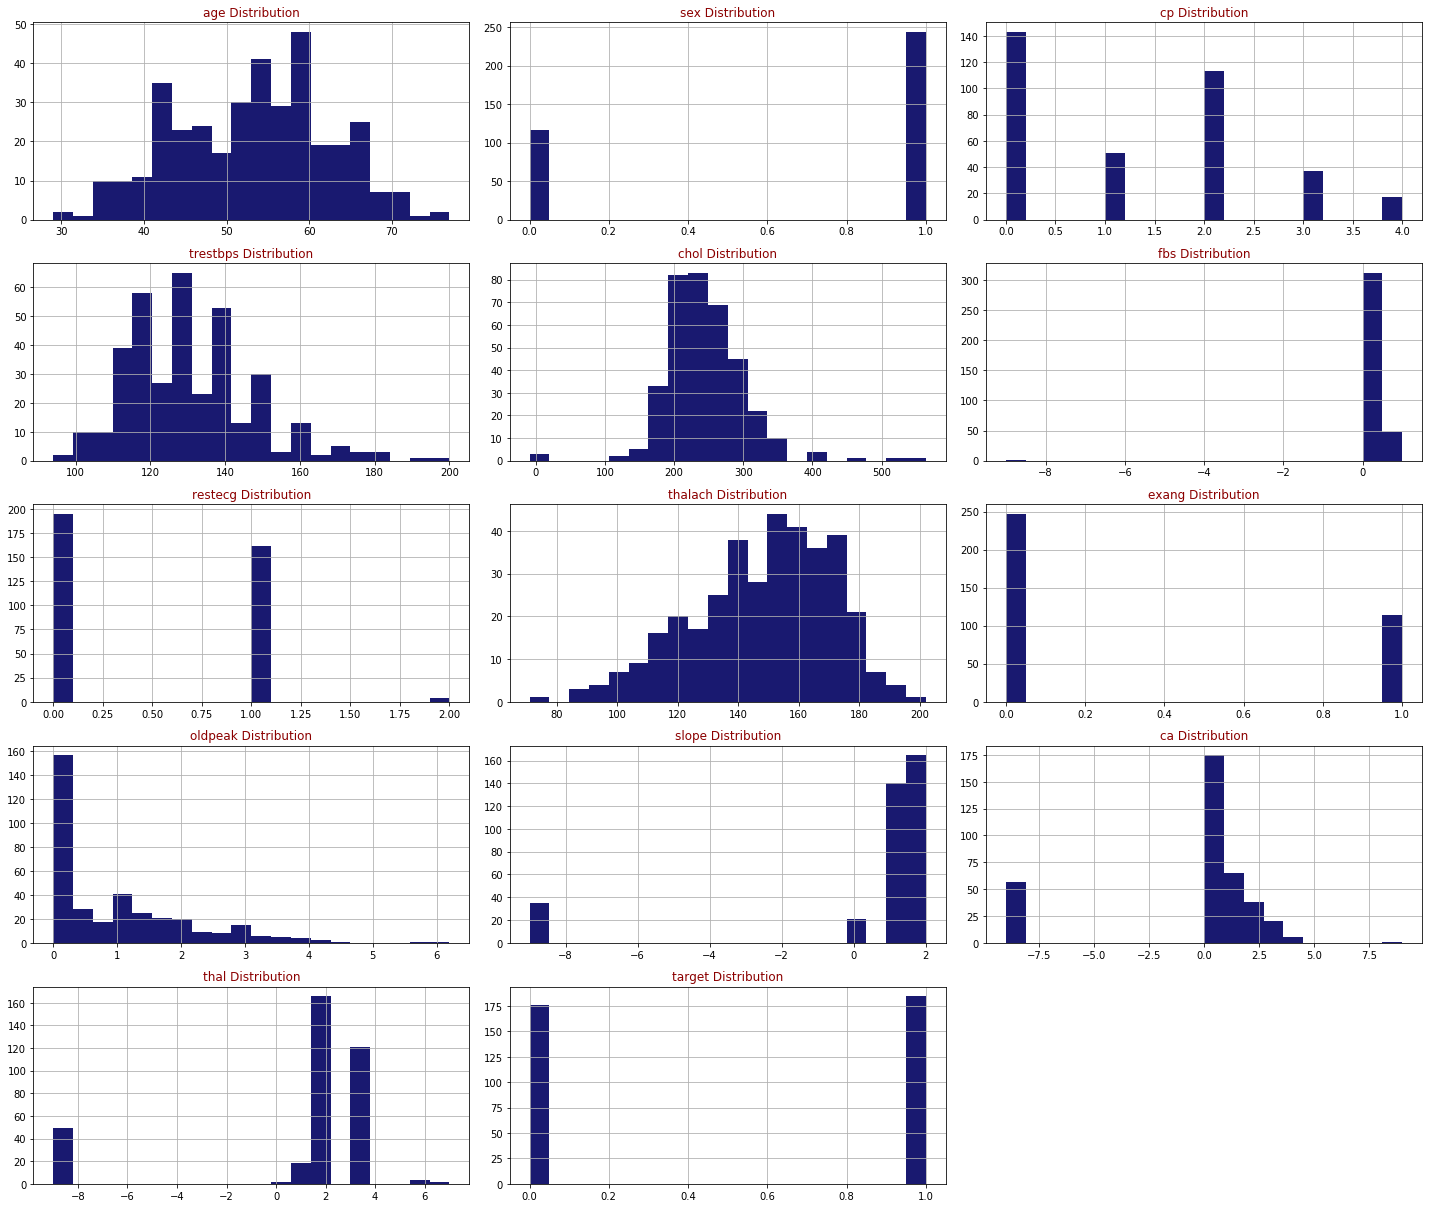

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,6,3)

In [7]:
data.target.value_counts()

1    185
0    176
Name: target, dtype: int64

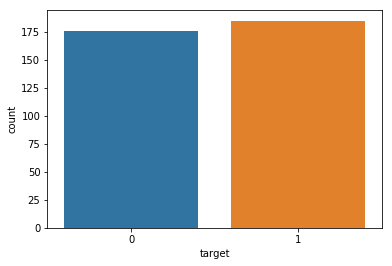

In [8]:
sns.countplot(x='target',data=data)

There are 176 with no heart disease and 185 at risk of heart disease

### Classification

Divide the data into two sets — a bigger chunk for training, and the other smaller chunk for testing. The classifier will use 
the training data-set to “learn”. We need a separate chunk of data for testing and validation, so that we can see how well our 
model works on data that it hasn’t seen before.

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
 target_raw, 
 test_size = 0.2, 
 random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 288 samples.
Testing set has 73 samples.


### Building a model

Training our model function using our data.
The function would internally use any algorithm of choice, and use the data to train itself and understand patterns, 
or learn.

In [10]:
# Import two classification metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: quality training set
       - X_test: features testing set
       - y_test: quality testing set
    '''
    
    results = {}
    
    """
    Fit/train the learner to the training data using slicing with 'sample_size' 
    using .fit(training_features[:], training_labels[:])
    """
    start = time() # Get start time of training
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size]) #Train the model
    end = time() # Get end time of training
    
    # Calculate the training time
    results['train_time'] = end - start
    
    """
    Get the predictions on the first 250 training samples(X_train), 
    and also predictions on the test set(X_test) using .predict()
    """
    start = time() # Get start time
    predictions_train = learner.predict(X_train[:288])
    predictions_test = learner.predict(X_test)
    
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 288 training samples which is y_train[:288]
    results['acc_train'] = accuracy_score(y_train[:288], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F1-score on the the first 288 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:288], predictions_train, beta=0.5, average='micro')
        
    # Compute F1-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Run the training and visualize the results

C:\Users\Tonye Iyalla\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GaussianNB trained on 2 samples.
GaussianNB trained on 28 samples.
GaussianNB trained on 288 samples.
DecisionTreeClassifier trained on 2 samples.
DecisionTreeClassifier trained on 28 samples.
DecisionTreeClassifier trained on 288 samples.
RandomForestClassifier trained on 2 samples.
RandomForestClassifier trained on 28 samples.
RandomForestClassifier trained on 288 samples.
LogisticRegression trained on 2 samples.
LogisticRegression trained on 28 samples.
LogisticRegression trained on 288 samples.


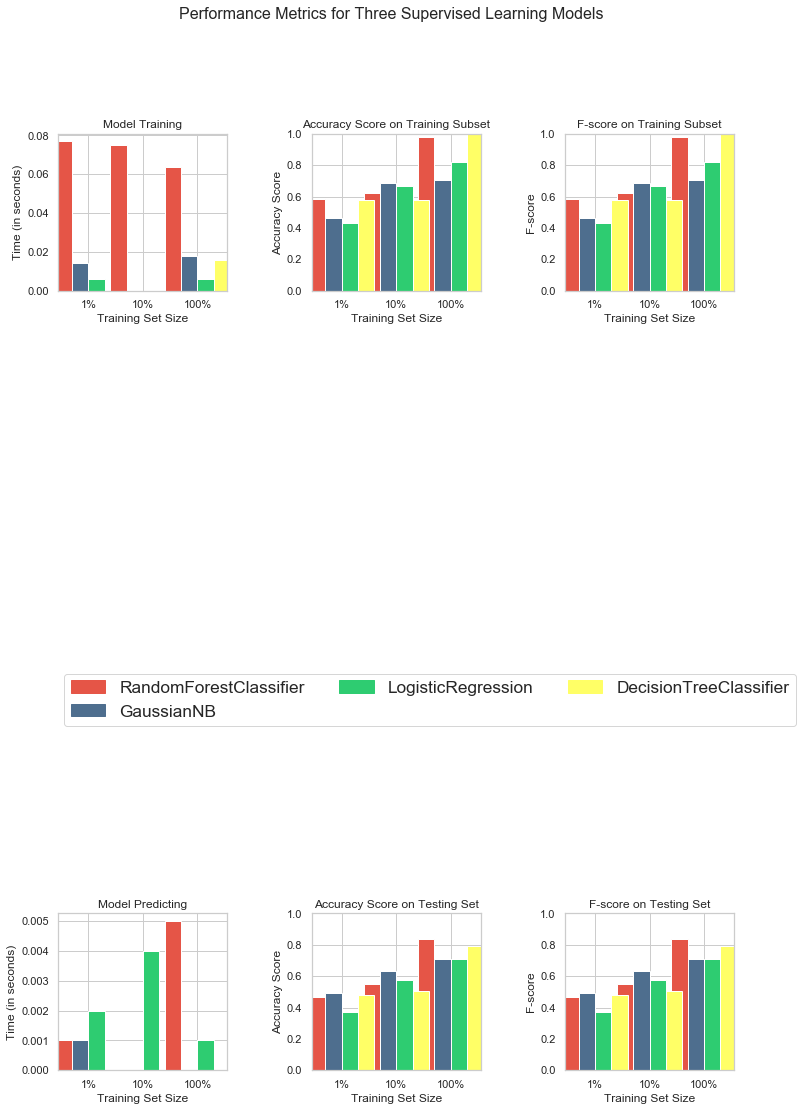

In [11]:
# Import any three supervised learning classification models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)
clf_D = LogisticRegression()
# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)
#print(results)
# Run metrics visualization for the three supervised learning models chosen
vs.visualize_classification_performance(results)


The above graph shows how well the algorithms performed in predictions. The first row shows the performance metrics on the
training data, and the second row shows the metrics for the testing data (data which hasn’t been seen before).

From these results we can see that RandomForest & DecisionTree Classifier performed better than GaussianNB and Logistic Regression.

Using RandomForest classifier's .feature_importance attribute we view the importance of each feature by its relative ranks when making predictions.

The graph shows the five most important features that determine is a patient is at risk for heart disease.

Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal'],
      dtype='object')
[0.08418566 0.03662985 0.10768572 0.06655047 0.07475854 0.00688498
 0.01588711 0.10591156 0.0335306  0.08683461 0.16351486 0.10502893
 0.11259712]


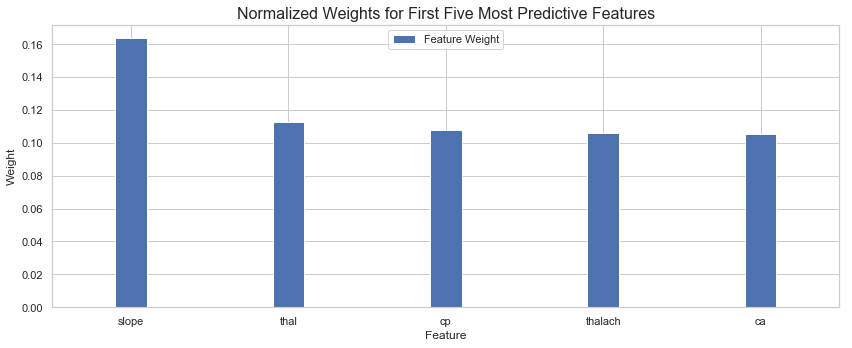

In [22]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)
# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)
# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(X_train.columns)
print(importances)
# Plot
vs.feature_plot(importances, X_train, y_train)

Confusion matrix for Logistic Regression

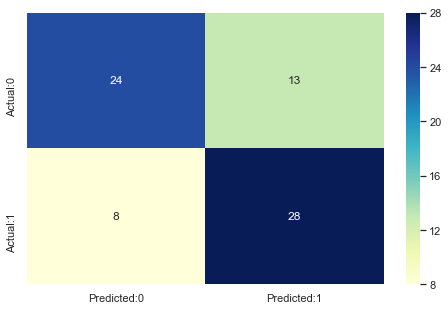

In [17]:
y_pred=clf_D.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
The confusion matrix shows 24+28 = 52 correct predictions and 13+8 = 21 incorrect ones from the total 73 test data.

In [ ]:
Gaussian Naive Bayes

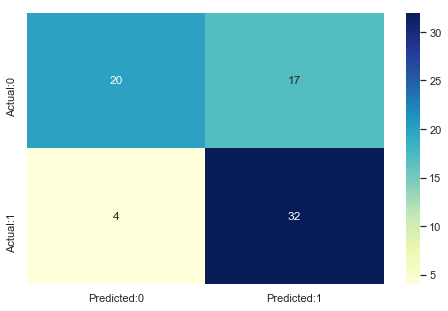

In [13]:
y_pred=clf_A.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
The confusion matrix shows 20+32 = 52 correct predictions and 17+4 = 21 incorrect ones from the total 73 test data.

In [ ]:
Decision Tree

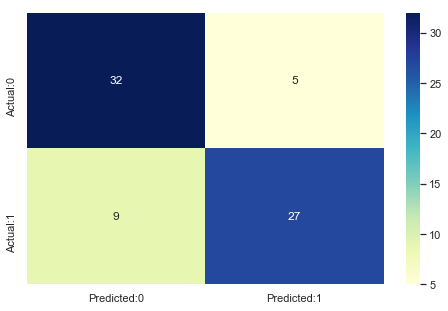

In [14]:
y_pred=clf_B.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
The confusion matrix shows 32+27 = 59 correct predictions and 9+5 = 14 incorrect ones from the total 73 test data.

In [ ]:
Random Forest

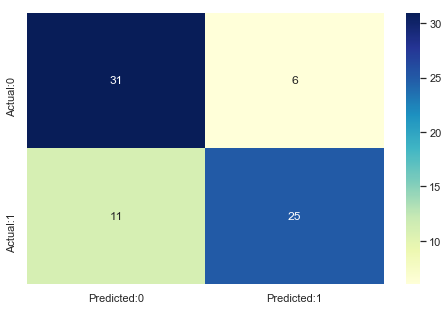

In [15]:
y_pred=clf_C.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 31+25 = 56 correct predictions and 11+6 = 17 incorrect ones from the total 73 test data.

#### True positives: 31
#### True negatives: 25
#### False positives: 6
#### False negatives: 11 -

### Hyperparameter Tuning 

Using scikit-learn API we can train and run cross validation on all possible combinations of these hyperparameters 
and give us the optimum configuration. We use this to validate our hypothesis on our algorithms; to verify that they are well 
tuned or tailored

In [20]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(max_depth=None, random_state=None)

# Create the parameters or base_estimators list you wish to tune, using a dictionary if needed.
# Example: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

"""
n_estimators: Number of trees in the forest
max_features: The number of features to consider when looking for the best split
max_depth: The maximum depth of the tree
"""
parameters = {'n_estimators': [10, 20, 30], 'max_features':[3,4,5, None], 'max_depth': [5,6,7, None]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average="micro")

# TODO: Perform grid search on the claszsifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average="micro")))
print("\nOptimized Model\n------")
print(best_clf)
print("\nFinal accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,  average="micro")))

Unoptimized model
------
Accuracy score on testing data: 0.7945
F-score on testing data: 0.7945

Optimized Model
------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Final accuracy score on the testing data: 0.8082
Final F-score on the testing data: 0.8082


### TESTING!!

Use new data to test our model for predictions

In [22]:
health_data = [[59,1,0,170,326,0,0,140,1,3.4,0,0,3],
            [64,1,3,170,227,0,0,155,0,0.6,1,0,3],
            [41,0,1,126,306,0,1,163,0,0,2,0,2],
              [43,0,1,100,223,0,0,142,0,0,-9,-9,-9],
              [48,0,4,138,214,0,0,108,1,1.5,2,-9,-9],
              [54,0,3,130,294,0,1,100,1,0,2,-9,-9],
              [41,0,1,126,306,0,1,163,0,0,2,0,2],
              [61,0,0,130,330,0,0,169,0,0,2,0,2],]

               
# Show predictions
for i, target in enumerate(best_clf.predict(health_data)):
    print("Predicted health for {} is: {}".format(i+1, target))

Predicted health for 1 is: 0
Predicted health for 2 is: 1
Predicted health for 3 is: 1
Predicted health for 4 is: 0
Predicted health for 5 is: 1
Predicted health for 6 is: 1
Predicted health for 7 is: 1
Predicted health for 8 is: 1
